## Import necessary libaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

## Import the data

In [2]:
airline_passangers = pd.read_excel('Airlines+Data.xlsx')
airline_passangers

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


## Data understanding

In [3]:
airline_passangers.shape

(96, 2)

In [4]:
airline_passangers.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [5]:
airline_passangers.isna().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
airline_passangers.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


## Visualise the data

In [7]:
df = pd.read_excel('Airlines+Data.xlsx',index_col='Month',parse_dates=True)
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


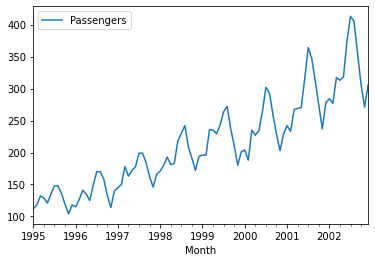

In [8]:
df.plot()
plt.show()

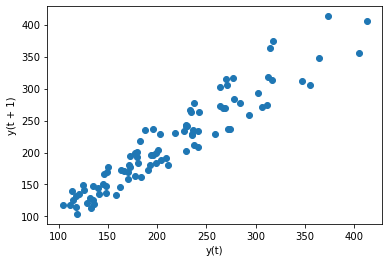

In [9]:
from pandas.plotting import lag_plot
lag_plot(df)
plt.show()

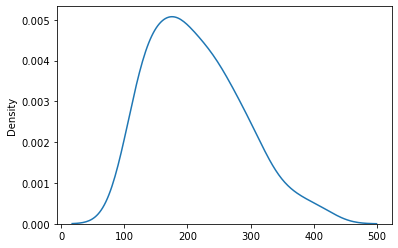

In [10]:
sns.distplot(df,hist=False)
plt.show()

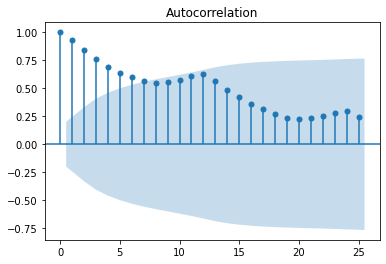

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df,lags=25)
plt.show()

##  Get daily passangers information

In [12]:
upsampled = df.resample('D').mean()
upsampled

,Passengers
Month,
1995-01-01,112.0
1995-01-02,NaN
1995-01-03,NaN
1995-01-04,NaN
1995-01-05,NaN
...,...
2002-11-27,NaN
2002-11-28,NaN
2002-11-29,NaN


In [13]:
interpolated = df.interpolate(method = 'linear')
interpolated

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


## Before Linear Interpolation

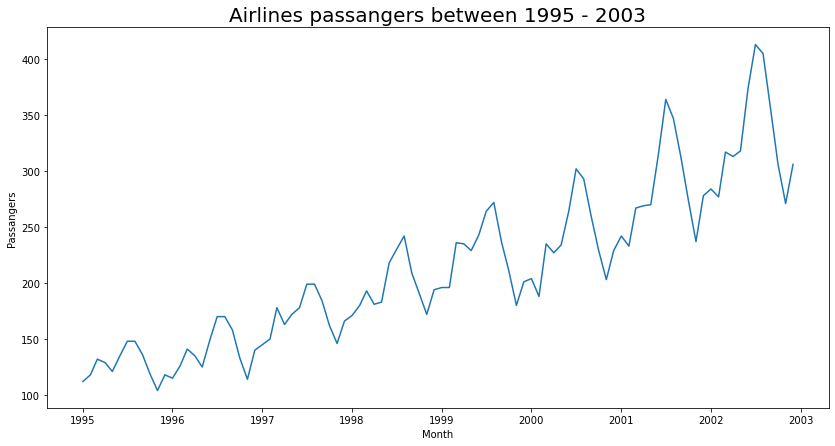

In [14]:
plt.figure(figsize = (14,7))
plt.plot(df)
plt.title('Airlines passangers between 1995 - 2003',size = 20)
plt.xlabel('Month')
plt.ylabel('Passangers')
plt.show()

## After Linear Interpolation

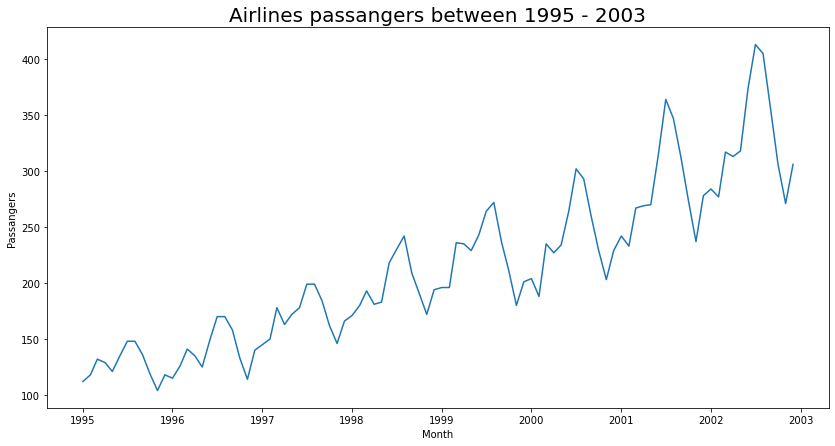

In [15]:
plt.figure(figsize = (14,7))
plt.plot(interpolated)
plt.title('Airlines passangers between 1995 - 2003',size = 20)
plt.xlabel('Month')
plt.ylabel('Passangers')
plt.show()

### Obseravtion

### No more siginificant change in plotting but we get daily passangers data

## downsampling

In [16]:
quarterly_passangers = df.resample('Q').mean()
quarterly_passangers

,Passengers
Month,
1995-03-31,120.666667
1995-06-30,128.333333
1995-09-30,144.000000
1995-12-31,113.666667
1996-03-31,127.333333
1996-06-30,136.333333
1996-09-30,166.000000
1996-12-31,129.000000
1997-03-31,157.666667


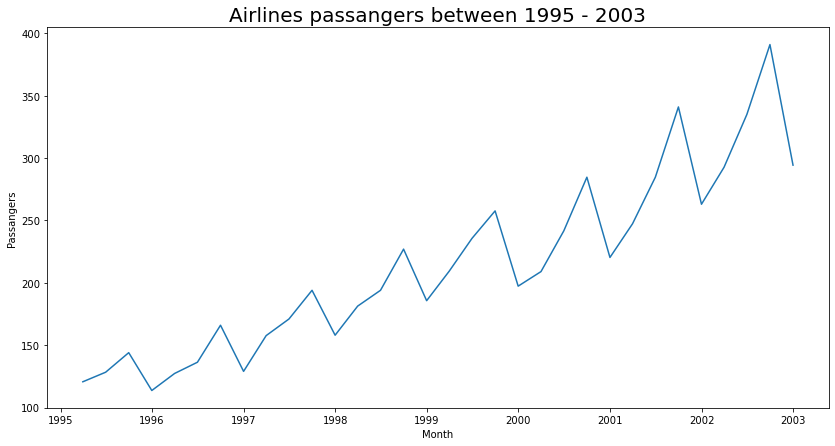

In [17]:
plt.figure(figsize = (14,7))
plt.plot(quarterly_passangers)
plt.title('Airlines passangers between 1995 - 2003',size = 20)
plt.xlabel('Month')
plt.ylabel('Passangers')
plt.show()

## Perform EDA 

In [18]:
import datetime as dt

In [19]:
airline_passangers['Months'] = airline_passangers['Month'].dt.strftime("%b")
airline_passangers['Year'] = airline_passangers['Month'].dt.strftime('%Y')
airline_passangers

,Month,Passengers,Months,Year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


### Pivot table

In [20]:
airline_pivot_table = pd.pivot_table(data = airline_passangers, values='Passengers',index='Year',columns='Months')
airline_pivot_table

Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


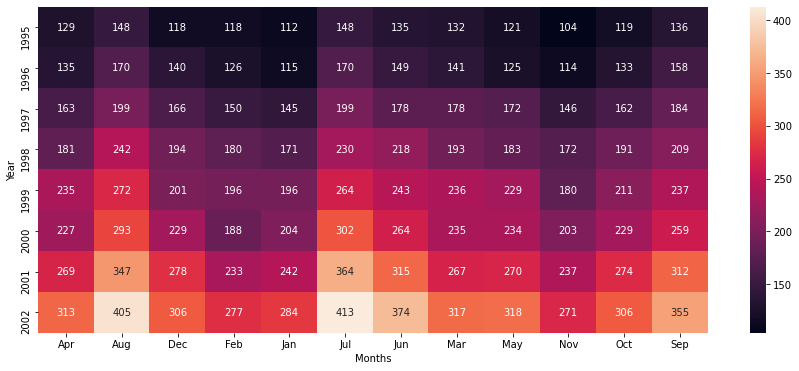

In [21]:
plt.figure(figsize=(15,6))
sns.heatmap(airline_pivot_table,annot=True, fmt='g')
plt.show()

### Observation

### In August and July are most passangers in 2002 

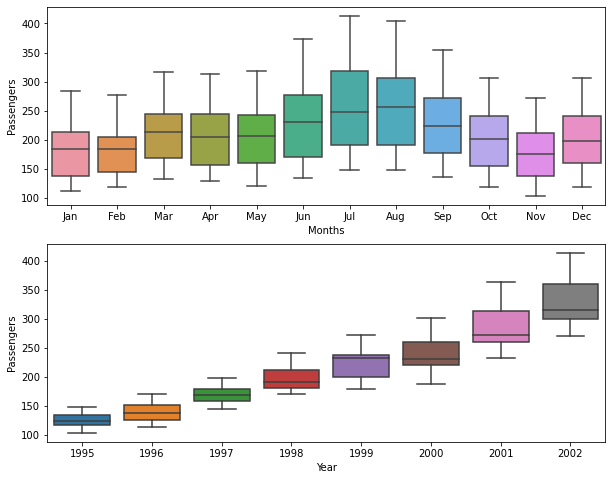

In [22]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.boxplot(x = airline_passangers.Months, y = airline_passangers.Passengers)
plt.subplot(2,1,2)
sns.boxplot(x = airline_passangers.Year, y = airline_passangers.Passengers)
plt.show()

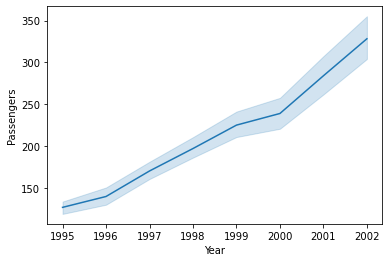

In [23]:
sns.lineplot(x = airline_passangers['Year'], y = airline_passangers['Passengers'])
plt.show()

In [24]:
airline_passangers_2 = airline_passangers.copy()

In [25]:
month_dummy = pd.get_dummies(airline_passangers_2.Months,)
data = pd.concat([airline_passangers_2,month_dummy],axis=1)
data

,Month,Passengers,Months,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [26]:
data['t'] = np.arange(1,97)
data['t_squared'] = data.t * data.t
data['log_passengers'] = np.log(data.Passengers)
data

,Month,Passengers,Months,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_passengers
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


## Model Building | Model Training | Model Testing

### splitting the data

In [27]:
train_data = data.head(84)
test_data  = data.tail(12)

In [28]:
#Linear Model
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~t',data = train_data).fit()
pred_linear = linear_model.predict(test_data['t'])
rmse_linear = np.sqrt(np.mean(((test_data.Passengers)-(pred_linear))**2))
rmse_linear

53.19923653480277

In [29]:
#Exponential

exp = smf.ols('log_passengers~t',data=train_data).fit()
pred_exp = exp.predict(test_data['t'])
rmse_exp = np.sqrt(np.mean(((test_data['Passengers'])-(np.exp(pred_exp)))**2))
rmse_exp

46.05736110315654

In [30]:
#Quadratic 

quad = smf.ols('Passengers~t+t_squared',data=train_data).fit()
pred_quad = quad.predict(test_data[['t','t_squared']])
rmse_quad = np.sqrt(np.mean(((test_data['Passengers'])-(pred_quad))**2))
rmse_quad

48.05188897933164

In [31]:
#Additive seasonality 

add_season = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_season = add_season.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])
rmse_add_season = np.sqrt(np.mean(((test_data['Passengers'])-(pred_add_season))**2))
rmse_add_season

132.81978481421817

In [32]:
#Additive Seasonality Quadratic 

add_season_quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_season_quad = add_season_quad.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']])
rmse_add_season_quad = np.sqrt(np.mean(((test_data['Passengers'])-(pred_add_season_quad))**2))
rmse_add_season_quad

26.360817612095907

In [33]:
##Multiplicative Seasonality

Mul_season = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_Mult_season = Mul_season.predict(test_data)
rmse_Mult_season = np.sqrt(np.mean(((test_data['Passengers'])-(np.exp(pred_Mult_season)))**2))
rmse_Mult_season

140.0632020470865

In [34]:
#Multiplicative Additive Seasonality 

Mul_Add_season = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_Mult_add_season = pd.Series(Mul_Add_season.predict(test_data))
rmse_Mult_add_season = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_Mult_add_season)))**2))
rmse_Mult_add_season

10.519172544324523

## Compare the RMSE Results

In [37]:
rmse_data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_season","rmse_add_season_quad","rmse_Mult_season","rmse_Mult_add_season"]),
             "RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_season,rmse_add_season_quad,rmse_Mult_season,rmse_Mult_add_season])}
table_rmse_data = pd.DataFrame(rmse_data)
table_rmse_data.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_season,10.519173
4,rmse_add_season_quad,26.360818
1,rmse_Exp,46.057361
2,rmse_Quad,48.051889
0,rmse_linear,53.199237
3,rmse_add_season,132.819785
5,rmse_Mult_season,140.063202


# Observation

## Multiplicative Additive Seasonality is least error value (RMSE 10.5)

# Predict for new data

In [39]:
t = np.arange(97,109)
t_squared = np.array(t*t)
Month =['2003-01-01','2003-02-01','2003-03-01','2003-04-01','2003-05-01','2003-06-01','2003-07-01','2003-08-01','2003-09-01','2003-10-01','2003-11-01','2003-12-01']
new_data = pd.DataFrame({'t':t,'t_squared':t_squared,'month':Month})
new_data

,t,t_squared,month
0,97,9409,2003-01-01
1,98,9604,2003-02-01
2,99,9801,2003-03-01
3,100,10000,2003-04-01
4,101,10201,2003-05-01
5,102,10404,2003-06-01
6,103,10609,2003-07-01
7,104,10816,2003-08-01
8,105,11025,2003-09-01
9,106,11236,2003-10-01


In [40]:
new_data.month = pd.to_datetime(new_data.month)
new_data['months'] = new_data.month.dt.strftime("%b")
months_dummy = pd.get_dummies(new_data.months)
pred = pd.concat([new_data,months_dummy],axis=1)
pred

,t,t_squared,month,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,97,9409,2003-01-01,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,98,9604,2003-02-01,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,99,9801,2003-03-01,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,100,10000,2003-04-01,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,101,10201,2003-05-01,May,0,0,0,0,0,0,0,0,1,0,0,0
5,102,10404,2003-06-01,Jun,0,0,0,0,0,0,1,0,0,0,0,0
6,103,10609,2003-07-01,Jul,0,0,0,0,0,1,0,0,0,0,0,0
7,104,10816,2003-08-01,Aug,0,1,0,0,0,0,0,0,0,0,0,0
8,105,11025,2003-09-01,Sep,0,0,0,0,0,0,0,0,0,0,0,1
9,106,11236,2003-10-01,Oct,0,0,0,0,0,0,0,0,0,0,1,0


In [43]:
# Build the model on entire dataset
model_full = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = data).fit()
pred_new  = pd.Series(model_full.predict(pred))

In [44]:
pred["forecasted_Passengers"] = pd.Series(np.exp(pred_new))
pred

,t,t_squared,month,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,forecasted_Passengers
0,97,9409,2003-01-01,Jan,0,0,0,0,1,0,0,0,0,0,0,0,320.779889
1,98,9604,2003-02-01,Feb,0,0,0,1,0,0,0,0,0,0,0,0,324.173779
2,99,9801,2003-03-01,Mar,0,0,0,0,0,0,0,1,0,0,0,0,374.075905
3,100,10000,2003-04-01,Apr,1,0,0,0,0,0,0,0,0,0,0,0,361.986306
4,101,10201,2003-05-01,May,0,0,0,0,0,0,0,0,1,0,0,0,359.632793
5,102,10404,2003-06-01,Jun,0,0,0,0,0,0,1,0,0,0,0,0,407.045777
6,103,10609,2003-07-01,Jul,0,0,0,0,0,1,0,0,0,0,0,0,452.677464
7,104,10816,2003-08-01,Aug,0,1,0,0,0,0,0,0,0,0,0,0,451.720349
8,105,11025,2003-09-01,Sep,0,0,0,0,0,0,0,0,0,0,0,1,404.569872
9,106,11236,2003-10-01,Oct,0,0,0,0,0,0,0,0,0,0,1,0,355.211286


In [45]:
new_var = pd.concat([data,pred])
new_var

,Month,Passengers,Months,Year,Apr,Aug,Dec,Feb,Jan,Jul,...,May,Nov,Oct,Sep,t,t_squared,log_passengers,month,months,forecasted_Passengers
0,1995-01-01,112.0,Jan,1995,0,0,0,0,1,0,...,0,0,0,0,1,1,4.718499,NaT,NaN,NaN
1,1995-02-01,118.0,Feb,1995,0,0,0,1,0,0,...,0,0,0,0,2,4,4.770685,NaT,NaN,NaN
2,1995-03-01,132.0,Mar,1995,0,0,0,0,0,0,...,0,0,0,0,3,9,4.882802,NaT,NaN,NaN
3,1995-04-01,129.0,Apr,1995,1,0,0,0,0,0,...,0,0,0,0,4,16,4.859812,NaT,NaN,NaN
4,1995-05-01,121.0,May,1995,0,0,0,0,0,0,...,1,0,0,0,5,25,4.795791,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,NaT,NaN,NaN,NaN,0,1,0,0,0,0,...,0,0,0,0,104,10816,NaN,2003-08-01,Aug,451.720349
8,NaT,NaN,NaN,NaN,0,0,0,0,0,0,...,0,0,0,1,105,11025,NaN,2003-09-01,Sep,404.569872
9,NaT,NaN,NaN,NaN,0,0,0,0,0,0,...,0,0,1,0,106,11236,NaN,2003-10-01,Oct,355.211286
10,NaT,NaN,NaN,NaN,0,0,0,0,0,0,...,0,1,0,0,107,11449,NaN,2003-11-01,Nov,311.768944


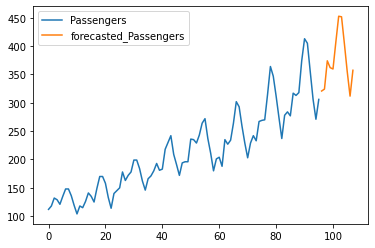

In [46]:
new_var[['Passengers','forecasted_Passengers']].reset_index(drop=True).plot()
plt.show()

## ============================== End  ==================================